In [7]:
import os
import matplotlib.pyplot as plt
import random

In [8]:
def read_results(directory):
    results = []

    files = os.listdir(directory)

    for file in files:
        if file.endswith('.txt') and 'results' in file:
            filepath = os.path.join(directory, file)
            algorithm_name = file.split("_")[0]

            # process the result file
            with open(filepath, 'r') as file:
                lines = file.readlines()
                test_info = {}
                for line in lines:
                    line = line.strip()
                    if line:  # check if the line is not empty
                        key, value = line.split(":")
                        test_info[key.strip()] = value.strip()
                    else:
                        if test_info:
                            num_edges = test_info['Test Name'].split('_')[1].split('.')[0]  
                            num_colors = test_info.get('Number of colors')
                            num_iterations = test_info.get('Number of iterations')
                            time_taken = test_info.get('Time taken (seconds)')

                            results.append({
                                'algorithm': algorithm_name,
                                'test_name': test_info['Test Name'],
                                'result': test_info['Result'],
                                'num_edges': int(num_edges),
                                'num_colors': int(num_colors) if num_colors is not None else None,
                                'num_iterations': int(num_iterations) if num_iterations is not None else None,
                                'time_taken' : float(time_taken),
                                'test_file': os.path.basename(filepath)  
                            })
                            test_info = {}

                # add the last test info if present
                if test_info:
                    num_edges = test_info['Test Name'].split('_')[1].split('.')[0]  
                    num_colors = test_info.get('Number of colors')
                    num_iterations = test_info.get('Number of iterations')
                    time_taken = test_info.get('Time taken (seconds)')
                    
                    results.append({
                        'algorithm': algorithm_name,
                        'test_name': test_info['Test Name'],
                        'result': test_info['Result'],
                        'num_edges': int(num_edges),
                        'num_colors': int(num_colors) if num_colors is not None else None,
                        'num_iterations': int(num_iterations) if num_iterations is not None else None,
                        'time_taken' : float(time_taken),
                        'test_file': os.path.basename(filepath)  
                    })

    return results

In [9]:
def plot_results_iters(results):
    _, axs = plt.subplots(3, 2, figsize=(10, 10))

    colors =['xkcd:ruby', 'xkcd:emerald green', 'xkcd:sky blue', 'xkcd:goldenrod', 'xkcd:purpley pink', 'xkcd:teal', 'xkcd:dark orange', 'xkcd:deep lavender', 'xkcd:slate blue', 'xkcd:dark mint green']
    names = ['bruteForce', 'simulatedAnnealing', 'vns', 'ga', 'pso', 'aco']  
    
    for i, ax in enumerate(axs.flat):
        if i < len(names):
            algorithm_results = [res for res in results if res['algorithm'] == names[i]]  # filter results by algorithm
            
            xs_found = []
            ys_found = []
            xs_not_found = []
            ys_not_found = []

            for result in algorithm_results:
                if result['result'] == 'Minimum edge coloring found.':
                    num_edges = result['num_edges']
                    num_iterations = result['num_iterations']
                    num_iterations = int(num_iterations) 

                    ys_found.append(num_iterations)
                    xs_found.append(num_edges)
                else:
                    # result was not found
                    num_edges = result['num_edges']
                    ys_not_found.append(-1)
                    xs_not_found.append(num_edges)

            if len(xs_found) != 0 or len(ys_found) != 0:
                xs_found_sorted, ys_found_sorted = zip(*sorted(zip(xs_found, ys_found)))

                ax.plot(xs_found_sorted, ys_found_sorted, color=random.choice(colors), marker='o', label='Found Result')  # connect sorted found results with a line and plot markers 
            
            ax.scatter(xs_not_found, ys_not_found, color='red', marker='x', label='Not Found')  # plot 'x' for not found results
            
            ax.set_xlabel('Number of Edges')  
            ax.set_ylabel('Number of Iterations')  
            ax.set_title(names[i])  

            # quick fix
            if len(xs_not_found) == 0:
                xs_not_found.append(0)
            if len(ys_not_found) == 0:
                ys_not_found.append(0)

            if len(xs_found) == 0:
                xs_found.append(0)
            if len(ys_found) == 0:
                ys_found.append(0)


            ax.set_xlim(0, max(max(xs_found), max(xs_not_found)) + 1)  
            ax.set_ylim(-10, max(max(ys_found), max(ys_not_found)) + 1)  
                
            ax.legend()  
            ax.grid(True)  
        
    plt.tight_layout()
    plt.show()  

In [10]:
def plot_results_time(results):
    _, axs = plt.subplots(3, 2, figsize=(10, 10))

    colors =['xkcd:ruby', 'xkcd:emerald green', 'xkcd:sky blue', 'xkcd:goldenrod', 'xkcd:purpley pink', 'xkcd:teal', 'xkcd:dark orange', 'xkcd:deep lavender', 'xkcd:slate blue', 'xkcd:dark mint green']
    names = ['bruteForce', 'simulatedAnnealing', 'vns', 'ga', 'pso', 'aco']  
    
    for i, ax in enumerate(axs.flat):
        if i < len(names):
            algorithm_results = [res for res in results if res['algorithm'] == names[i]]  # filter results by algorithm
            
            xs_found = []
            ys_found = []
            xs_not_found = []
            ys_not_found = []

            for result in algorithm_results:
                if result['result'] == 'Minimum edge coloring found.':
                    num_edges = result['num_edges']
                    time_taken = result['time_taken']

                    ys_found.append(round(time_taken, 2))
                    xs_found.append(num_edges)
                else:
                    # result was not found
                    num_edges = result['num_edges']
                    time_taken = result['time_taken']

                    ys_not_found.append(round(time_taken, 2))
                    xs_not_found.append(num_edges)

            if len(xs_found) != 0 or len(ys_found) != 0:
                xs_found_sorted, ys_found_sorted = zip(*sorted(zip(xs_found, ys_found)))

                ax.plot(xs_found_sorted, ys_found_sorted, color=random.choice(colors), marker='o', label='Found Result')  # connect sorted found results with a line and plot markers 
            ax.scatter(xs_not_found, ys_not_found, color='red', marker='x', label='Time limit exceeded')  # plot 'x' for not found results
            
            ax.set_xlabel('Number of Edges')  
            ax.set_ylabel('Time taken in seconds')  
            ax.set_title(names[i])  

            # quick fix
            if len(xs_not_found) == 0:
                xs_not_found.append(0)
            if len(ys_not_found) == 0:
                ys_not_found.append(0)

            if len(xs_found) == 0:
                xs_found.append(0)
            if len(ys_found) == 0:
                ys_found.append(0)

                
            ax.set_xlim(0, max(max(xs_found), max(xs_not_found)) + 1) 
            # dont delete
            # ax.set_ylim(-5, max(max(ys_found), max(ys_not_found)) + 15)  

            ax.legend()  
            ax.grid(True)  

    plt.tight_layout()
    plt.show()  

In [11]:
def plot_results_colors(results):
    _, axs = plt.subplots(3, 2, figsize=(10, 10))

    colors =['xkcd:ruby', 'xkcd:emerald green', 'xkcd:sky blue', 'xkcd:goldenrod', 'xkcd:purpley pink', 'xkcd:teal', 'xkcd:dark orange', 'xkcd:deep lavender', 'xkcd:slate blue', 'xkcd:dark mint green']
    names = ['bruteForce', 'simulatedAnnealing', 'vns', 'ga', 'pso', 'aco']  
    
    for i, ax in enumerate(axs.flat):
        if i < len(names):
            algorithm_results = [res for res in results if res['algorithm'] == names[i]]  # filter results by algorithm
            
            xs_found = []
            ys_found = []
            xs_not_found = []
            ys_not_found = []

            for result in algorithm_results:
                if result['result'] == 'Minimum edge coloring found.':
                    num_colors = result['num_colors']
                    time_taken = result['time_taken']

                    ys_found.append(round(time_taken, 2))
                    xs_found.append(num_colors)
                else:
                    # result was not found
                    time_taken = result['time_taken']

                    ys_not_found.append(round(time_taken, 2))
                    xs_not_found.append(-1)
            
            if len(xs_found) != 0 or len(ys_found) != 0:
                xs_found_sorted, ys_found_sorted = zip(*sorted(zip(xs_found, ys_found)))

                ax.plot(xs_found_sorted, ys_found_sorted, color=random.choice(colors), marker='o', label='Found Result')  # connect sorted found results with a line and plot markers 
            ax.scatter(xs_not_found, ys_not_found, color='red', marker='x', label='Time limit exceeded')  # plot 'x' for not found results
            
            ax.set_xlabel('Number of colors')  
            ax.set_ylabel('Time taken in seconds')  
            ax.set_title(names[i])  

            # quick fix
            if len(xs_not_found) == 0:
                xs_not_found.append(0)
            if len(ys_not_found) == 0:
                ys_not_found.append(0)
                
            if len(xs_found) == 0:
                xs_found.append(0)
            if len(ys_found) == 0:
                ys_found.append(0)


            ax.set_xlim(0, max(max(xs_found), max(xs_not_found)) + 1) 
            # dont delete
            # ax.set_ylim(-5, max(max(ys_found), max(ys_not_found)) + 15)  

            ax.legend()  
            ax.grid(True)  

    plt.tight_layout()
    plt.show()  

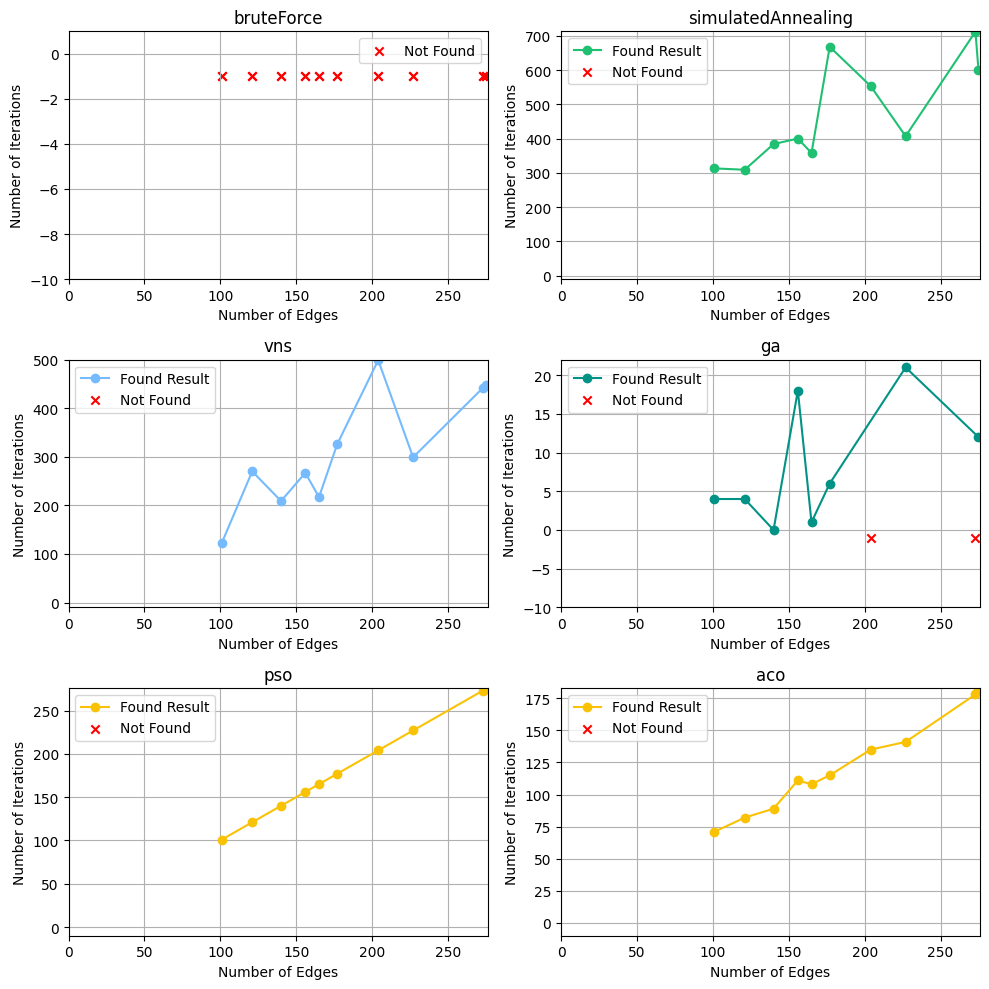

In [12]:
results = read_results('./results')
plot_results_iters(results)

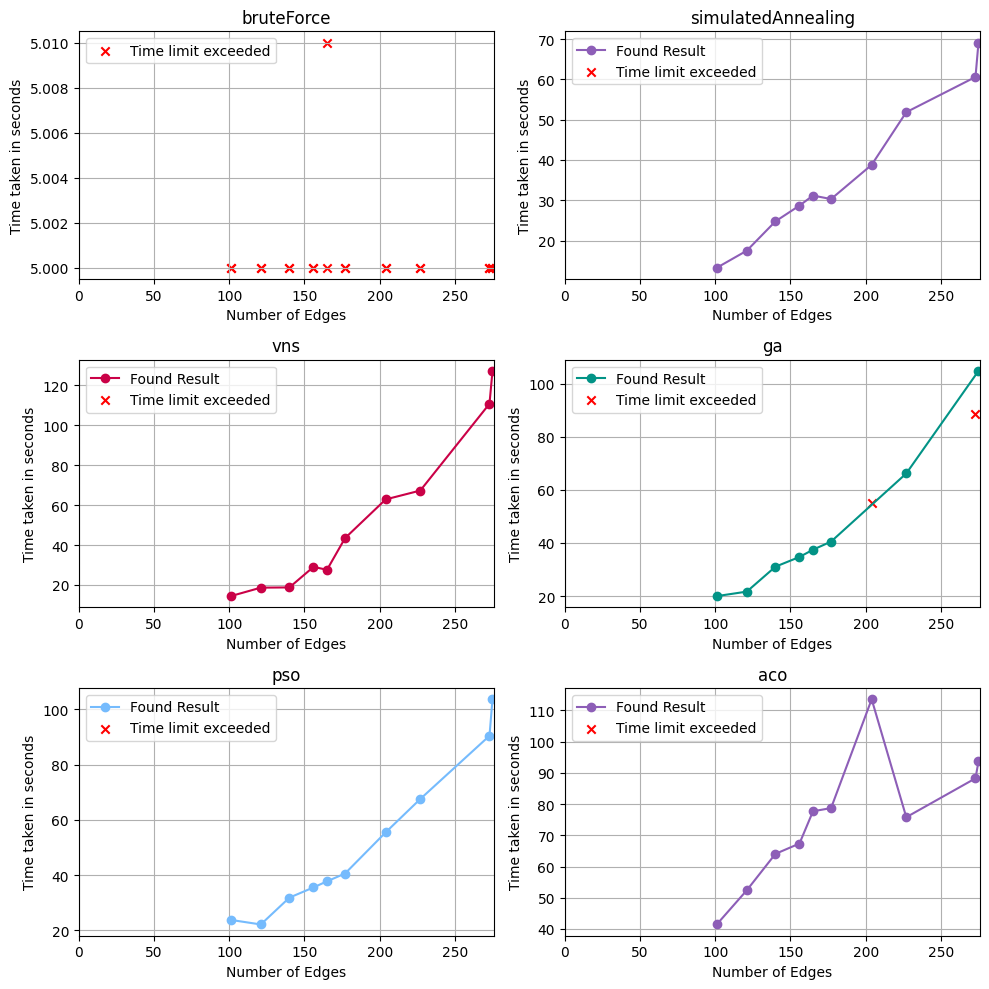

In [13]:
plot_results_time(results)

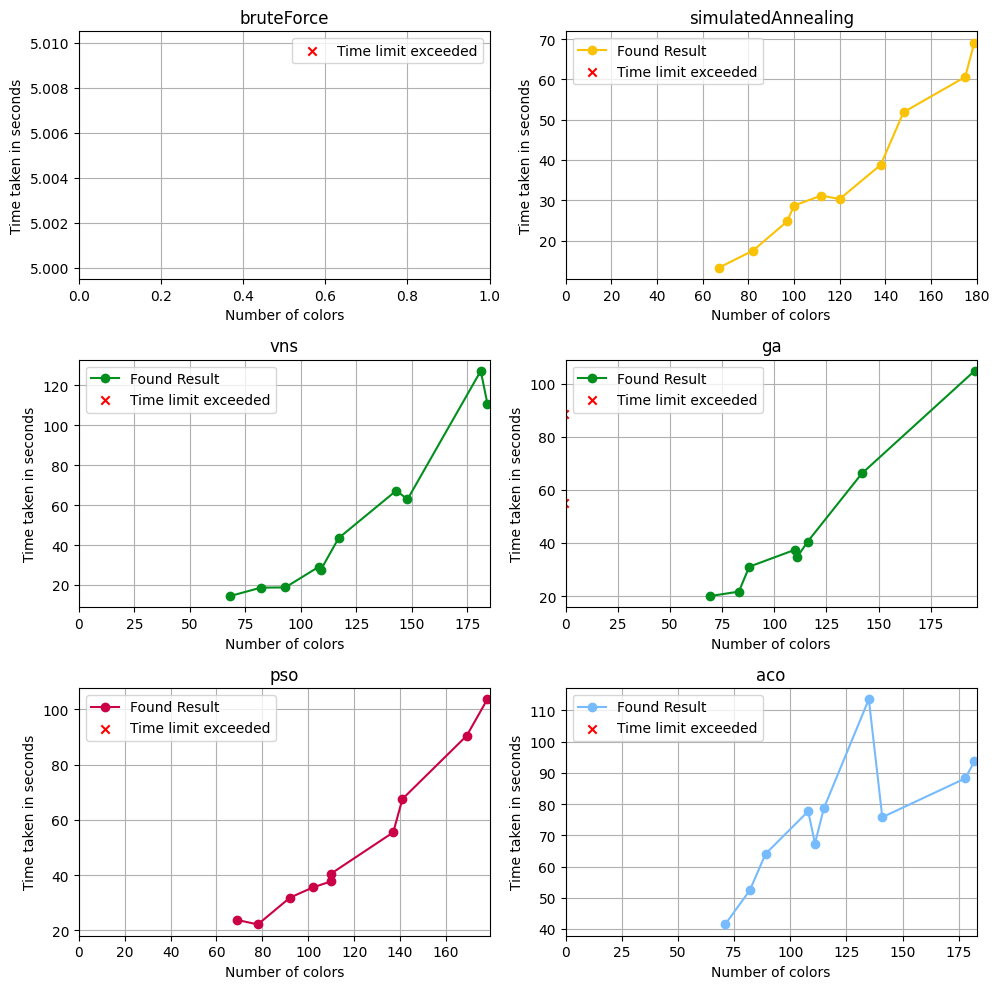

In [14]:
plot_results_colors(results)